In [12]:
# importing libraries and packages
%run ./Utilities.ipynb

In [8]:
# global variables
num_of_company = 10000
company_names = [f"Company {i+1}" for i in range(num_of_company)]
year = 2013
end_year = 2023
min_rev, max_rev = 500000, 90000000
spy_return = {
    2023: 14.71,
    2022: -19.44,
    2021: 26.89,
    2020: 16.26,
    2019: 28.88,
    2018: -6.24,
    2017: 19.42,
    2016: 9.54,
    2015: -0.73,
    2014: 11.39,
    2013: 29.60,
    2012: 13.41
}
folder_path = 'assets'


In [9]:
# Sample data generation - WARNING: Every time you run this it will generate a brand new dataset

data = {
    'I1: Company Name': company_names,
    'I2: Number of Employee': [random.randint(50, 2000) for _ in range(num_of_company)],
    'I3: Revenue': [random.randint(min_rev, max_rev) for _ in range(num_of_company)],
    'I4: Year' : [year for _ in range(num_of_company)],
    'E1: Carbon emissions and intensity': [random.randint(1, 100) for _ in range(num_of_company)],
    'E2: Energy consumption and renewable energy use': [random.randint(1, 100) for _ in range(num_of_company)],
    'E3: Water usage and management': [random.randint(1, 100) for _ in range(num_of_company)],
    'E4: Waste generation and recycling rates': [random.randint(1, 100) for _ in range(num_of_company)],
    'E5: Air and water pollution levels': [random.randint(1, 100) for _ in range(num_of_company)],
    'E6: Biodiversity conservation efforts': [random.randint(1, 100) for _ in range(num_of_company)],
    'S1: Employee diversity and inclusion': [random.randint(1, 100) for _ in range(num_of_company)],
    'S2: Labor practices and working conditions': [random.randint(1, 100) for _ in range(num_of_company)],
    'S3: Health and safety performance': [random.randint(1, 100) for _ in range(num_of_company)],
    'S4: Employee turnover and satisfaction': [random.randint(1, 100) for _ in range(num_of_company)],
    'S5: Community engagement and philanthropic activities': [random.randint(1, 100) for _ in range(num_of_company)],
    'S6: Product quality and safety': [random.randint(1, 100) for _ in range(num_of_company)],
    'G1: Board diversity and composition': [random.randint(1, 100) for _ in range(num_of_company)],
    'G2: Executive compensation and incentives': [random.randint(1, 100) for _ in range(num_of_company)],
    'G3: Transparency of executive pay ratios': [random.randint(1, 100) for _ in range(num_of_company)],
    'G4: Shareholder rights and engagement': [random.randint(1, 100) for _ in range(num_of_company)],
    'G5: Ethical business conduct and anti-corruption policies': [random.randint(1, 100) for _ in range(num_of_company)],
    'G6: Risk management and regulatory compliance': [random.randint(1, 100) for _ in range(num_of_company)]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define weights for each GRI category (these are example weights)
weights = {
    'E': 0.4,
    'S': 0.3,
    'G': 0.3
}

columns_to_standardize = df.columns.tolist()[4:]

curdf = df.copy()
for y in range(year+1, end_year):
    newdf = generate_random(y, columns_to_standardize, curdf.copy())
    df = pd.concat([df, newdf])
    curdf = newdf

# Min-Max scaling to normalize columns to a 1-100 range
for column in columns_to_standardize:
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = ((df[column] - min_value) / (max_value - min_value)) * 99 + 1

# Calculate weighted ESG score for each row
for k in weights.keys():
    name = k + ' Average Score'
    lst = [col for col in columns_to_standardize if col[0] == k]
    size = len(lst)
    df[name] = df.apply(lambda row: sum(row[col] for col in columns_to_standardize if col[0] == k) / size, axis=1)
    for cur in lst:
        cur_name = cur[:2] + ' Difference than Average'
        df[cur_name] = df[cur] - df[name]
    
df['ESG_Score'] = df.apply(lambda row: sum(row[col] * weights[col[0]] for col in columns_to_standardize), axis=1)


# Scale the ESG scores to a 1-100 range
min_score = df['ESG_Score'].min()
max_score = df['ESG_Score'].max()
df['ESG_Score'] = ((df['ESG_Score'] - min_score) / (max_score - min_score)) * 99 + 1

df = df.round(2)

df['Stock Price: Average, Min, Max'] = df.apply(lambda row: add_stock_price(row), axis=1)

df

,I1: Company Name,I2: Number of Employee,I3: Revenue,I4: Year,E1: Carbon emissions and intensity,E2: Energy consumption and renewable energy use,E3: Water usage and management,E4: Waste generation and recycling rates,E5: Air and water pollution levels,E6: Biodiversity conservation efforts,...,S6 Difference than Average,G Average Score,G1 Difference than Average,G2 Difference than Average,G3 Difference than Average,G4 Difference than Average,G5 Difference than Average,G6 Difference than Average,ESG_Score,"Stock Price: Average, Min, Max"
0,Company 1,579,9090287.00,2013,84.16,22.78,62.38,18.82,31.69,7.93,...,-14.19,65.02,-13.53,33.99,18.15,8.25,-51.15,4.29,50.09,"[3.08, 1.59, 3.45]"
1,Company 2,358,81142727.00,2013,63.37,72.28,6.94,4.96,80.20,65.35,...,-22.77,34.00,-31.02,18.48,39.27,-16.17,-17.16,6.60,45.11,"[5.06, 3.43, 5.7]"
2,Company 3,1718,73949501.00,2013,17.83,19.81,17.83,99.01,100.00,74.26,...,47.52,51.00,3.46,-13.37,-8.42,-31.19,45.04,4.45,42.99,"[5.09, 3.97, 5.98]"
3,Company 4,260,13126354.00,2013,45.55,42.58,96.04,24.76,90.10,18.82,...,-31.84,55.12,-53.13,36.96,21.12,37.95,-36.30,-6.60,55.64,"[3.51, 2.8, 4.9]"
4,Company 5,52,81373156.00,2013,41.59,84.16,4.96,5.95,62.38,17.83,...,12.87,42.58,-0.00,27.72,-23.76,-35.64,34.65,-2.97,43.76,"[5.88, 4.27, 7.67]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Company 9996,358,2741939.78,2022,9.91,6.94,79.21,81.19,63.37,73.27,...,-26.73,35.48,62.54,-10.72,-29.53,-27.55,28.88,-23.59,44.65,"[1.32, 1.06, 1.47]"
9996,Company 9997,409,21491906.94,2022,19.81,31.69,15.85,62.38,11.89,35.65,...,13.70,39.28,-35.31,-32.34,26.07,7.26,7.26,27.06,36.55,"[2.09, 1.77, 2.52]"
9997,Company 9998,766,18188913.17,2022,46.54,48.52,74.26,75.25,69.31,86.14,...,37.62,49.84,-32.01,13.53,-29.04,23.43,7.59,16.50,61.69,"[2.47, 1.92, 3.16]"
9998,Company 9999,831,58917159.33,2022,69.31,45.55,27.73,16.84,65.35,88.12,...,28.71,37.80,-24.92,-1.16,27.56,22.60,6.76,-30.86,46.92,"[1.74, 1.2, 2.1]"


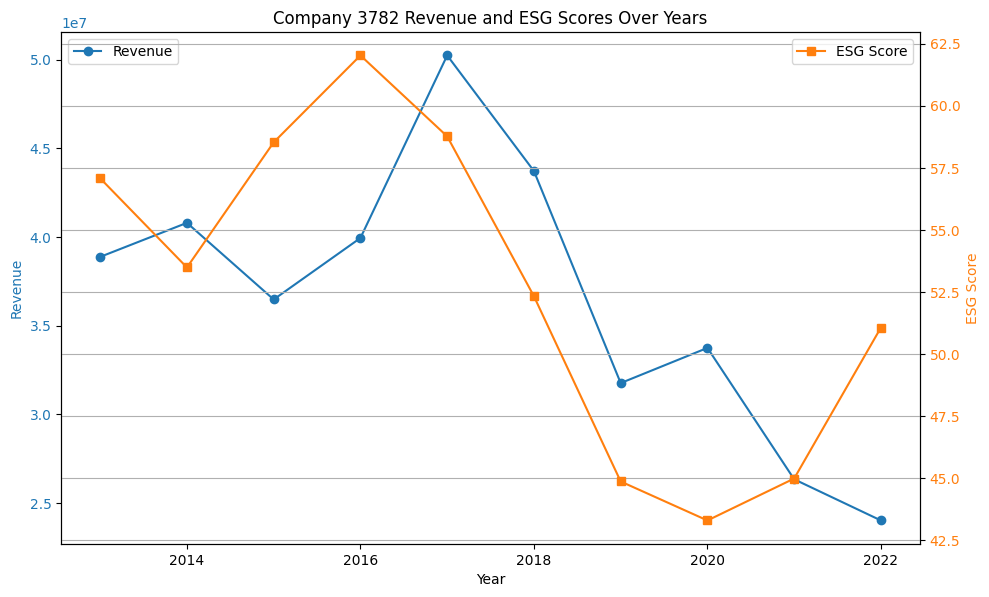

In [13]:
# randomly visiualize a company 

com = random.randint(0, num_of_company)
vdf = df[df['I1: Company Name'] == f'Company {com}']
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue', color=color)
ax1.plot(vdf['I4: Year'], vdf['I3: Revenue'], color=color, marker='o', label='Revenue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
ax2.set_ylabel('ESG Score', color=color)
ax2.plot(vdf['I4: Year'], vdf['ESG_Score'], color=color, marker='s', label='ESG Score')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'Company {com} Revenue and ESG Scores Over Years')
plt.grid()
plt.show()


In [18]:
# Save the DataFrame to a CSV file
csv_file_path = os.path.join(folder_path, 'ESGData13-22.csv')
df.to_csv(csv_file_path, index=False)


In [19]:
X = df[columns_to_standardize]
y = df['ESG_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
esgmodel = LinearRegression()

# Train the model on the training data
esgmodel.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_pred = esgmodel.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for ESG score: {mse:.2f}")

# Save the model to a file
model_filename = 'assets/linear_ESG_model.pkl'
joblib.dump(esgmodel, model_filename)

print ("assets/linear_ESG_model.pkl saved")

# Load the saved model
loaded_model = joblib.load(model_filename)

# Use the loaded model for predictions
# ... Make predictions using loaded_model.predict() 

Mean Squared Error for ESG score: 0.00
assets/linear_ESG_model.pkl saved


In [20]:
X = df['I3: Revenue'].to_numpy().reshape(-1, 1)
y = df['Stock Price: Average, Min, Max'].tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
revmodel = MultiOutputRegressor(LinearRegression())

# Train the model on the training data
revmodel.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_pred = revmodel.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Stock price based on revenue: {mse:.2f}")

# Save the model to a file
model_filename = 'assets/linear_Stock_model.pkl'
joblib.dump(revmodel, model_filename)

print ("assets/linear_Stock_model.pkl saved")

# Load the saved model
loaded_model = joblib.load(model_filename)

# Use the loaded model for predictions
# ... Make predictions using loaded_model.predict() 

Mean Squared Error for Stock price based on revenue: 7.11
assets/linear_Stock_model.pkl saved


In [21]:
X = df[columns_to_standardize + ['I3: Revenue']]
y = df['Stock Price: Average, Min, Max'].tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
revesgmodel = MultiOutputRegressor(LinearRegression())

# Train the model on the training data
revesgmodel.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_pred = revesgmodel.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for ESG score: {mse:.2f}")

# Save the model to a file
model_filename = 'assets/linear_Stock_ESG_model.pkl'
joblib.dump(revesgmodel, model_filename)

print ("assets/linear_Stock_ESG_model.pkl saved")

# Load the saved model
loaded_model = joblib.load(model_filename)

# Use the loaded model for predictions
# ... Make predictions using loaded_model.predict() 

Mean Squared Error for ESG score: 5.07
assets/linear_Stock_ESG_model.pkl saved


In [22]:
# Choose a test data for the following demo
test_data = df.sample(n=1)
test_data

,I1: Company Name,I2: Number of Employee,I3: Revenue,I4: Year,E1: Carbon emissions and intensity,E2: Energy consumption and renewable energy use,E3: Water usage and management,E4: Waste generation and recycling rates,E5: Air and water pollution levels,E6: Biodiversity conservation efforts,...,S6 Difference than Average,G Average Score,G1 Difference than Average,G2 Difference than Average,G3 Difference than Average,G4 Difference than Average,G5 Difference than Average,G6 Difference than Average,ESG_Score,"Stock Price: Average, Min, Max"
2373,Company 2374,69,64713970.9,2016,82.18,45.55,60.4,15.85,77.23,95.05,...,14.36,36.97,13.53,57.09,-27.06,-23.1,-21.12,0.66,47.97,"[4.65, 3.45, 6.64]"


In [23]:
# Make a prediction using the trained model
print("Testing a row for Prediction...")
predicted_esg_score = esgmodel.predict(test_data[columns_to_standardize])
print(f"Predicted ESG Score: {predicted_esg_score[0]:.2f}")

predicted_stock_by_revenue = revmodel.predict(test_data['I3: Revenue'].to_numpy().reshape(-1, 1))
print(f"Predicted Based on Revenue from Stock Price - AVG: {predicted_stock_by_revenue[0][0]:.2f}, \
MIN: {predicted_stock_by_revenue[0][1]:.2f}, MAX: {predicted_stock_by_revenue[0][2]:.2f}")

predicted_stock_ESG_by_revenue = revesgmodel.predict(test_data[columns_to_standardize + ['I3: Revenue']])
print(f"Predicted Based on Revenue from Stock Price AND ESG - AVG: {predicted_stock_ESG_by_revenue[0][0]:.2f}, \
MIN: {predicted_stock_ESG_by_revenue[0][1]:.2f}, MAX: {predicted_stock_ESG_by_revenue[0][2]:.2f}")

Testing a row for Prediction...
Predicted ESG Score: 47.97
Predicted Based on Revenue from Stock Price - AVG: 4.50, MIN: 3.15, MAX: 5.84
Predicted Based on Revenue from Stock Price AND ESG - AVG: 4.08, MIN: 2.85, MAX: 5.29


In [24]:
# Make suggestions to improve ESG score and potential Stock Price for test data
columns_to_rank = [col for col in test_data.columns if 'Difference' in col]
kv = {col[:2]:col for col in columns_to_standardize}
ranked_df = test_data[columns_to_rank].apply(lambda row: row.rank(ascending=False), axis=1)

bottom_three = ranked_df.apply(lambda row: row.nlargest(3).index.tolist(), axis=1).to_list()[0]
top_three = ranked_df.apply(lambda row: row.nsmallest(3).index.tolist(), axis=1).to_list()[0]

bottom_three_col = [kv[c[:2]] for c in bottom_three]
top_three_col = [kv[c[:2]] for c in top_three]

print(f'These three are hurting you ESG Score: {bottom_three_col}')
print(f'These three are top of your ESG metrics: {top_three_col}')



These three are hurting you ESG Score: ['E4: Waste generation and recycling rates', 'G3: Transparency of executive pay ratios', 'S1: Employee diversity and inclusion']
These three are top of your ESG metrics: ['G2: Executive compensation and incentives', 'E6: Biodiversity conservation efforts', 'S5: Community engagement and philanthropic activities']


In [ ]:
# Make predictions on suggestions


In [36]:
print(test_data[test_data.columns.to_list()[:22]].to_dict(orient='records'))

[{'I1: Company Name': 'Company 2374', 'I2: Number of Employee': 69, 'I3: Revenue': 64713970.9, 'I4: Year': 2016, 'E1: Carbon emissions and intensity': 82.18, 'E2: Energy consumption and renewable energy use': 45.55, 'E3: Water usage and management': 60.4, 'E4: Waste generation and recycling rates': 15.85, 'E5: Air and water pollution levels': 77.23, 'E6: Biodiversity conservation efforts': 95.05, 'S1: Employee diversity and inclusion': 15.85, 'S2: Labor practices and working conditions': 34.66, 'S3: Health and safety performance': 64.36, 'S4: Employee turnover and satisfaction': 15.85, 'S5: Community engagement and philanthropic activities': 65.35, 'S6: Product quality and safety': 56.44, 'G1: Board diversity and composition': 50.5, 'G2: Executive compensation and incentives': 94.06, 'G3: Transparency of executive pay ratios': 9.91, 'G4: Shareholder rights and engagement': 13.87, 'G5: Ethical business conduct and anti-corruption policies': 15.85, 'G6: Risk management and regulatory com

In [27]:
def generate_input_df():
    num_of_company = 1
    data = {
    'I1: Company Name': ['Company Example'],
    'I2: Number of Employee': [random.randint(50, 2000) for _ in range(num_of_company)],
    'I3: Revenue': [random.randint(min_rev, max_rev) for _ in range(num_of_company)],
    'I4: Year' : [2023],
    'E1: Carbon emissions and intensity': [random.randint(1, 100) for _ in range(num_of_company)],
    'E2: Energy consumption and renewable energy use': [random.randint(1, 100) for _ in range(num_of_company)],
    'E3: Water usage and management': [random.randint(1, 100) for _ in range(num_of_company)],
    'E4: Waste generation and recycling rates': [random.randint(1, 100) for _ in range(num_of_company)],
    'E5: Air and water pollution levels': [random.randint(1, 100) for _ in range(num_of_company)],
    'E6: Biodiversity conservation efforts': [random.randint(1, 100) for _ in range(num_of_company)],
    'S1: Employee diversity and inclusion': [random.randint(1, 100) for _ in range(num_of_company)],
    'S2: Labor practices and working conditions': [random.randint(1, 100) for _ in range(num_of_company)],
    'S3: Health and safety performance': [random.randint(1, 100) for _ in range(num_of_company)],
    'S4: Employee turnover and satisfaction': [random.randint(1, 100) for _ in range(num_of_company)],
    'S5: Community engagement and philanthropic activities': [random.randint(1, 100) for _ in range(num_of_company)],
    'S6: Product quality and safety': [random.randint(1, 100) for _ in range(num_of_company)],
    'G1: Board diversity and composition': [random.randint(1, 100) for _ in range(num_of_company)],
    'G2: Executive compensation and incentives': [random.randint(1, 100) for _ in range(num_of_company)],
    'G3: Transparency of executive pay ratios': [random.randint(1, 100) for _ in range(num_of_company)],
    'G4: Shareholder rights and engagement': [random.randint(1, 100) for _ in range(num_of_company)],
    'G5: Ethical business conduct and anti-corruption policies': [random.randint(1, 100) for _ in range(num_of_company)],
    'G6: Risk management and regulatory compliance': [random.randint(1, 100) for _ in range(num_of_company)]
    }

    return pd.DataFrame(data)

def load_models():
    esg = joblib.load('assets/linear_ESG_model.pkl')
    stock = joblib.load('assets/linear_Stock_model.pkl')
    stock_esg = joblib.load('assets/linear_Stock_ESG_model.pkl')
    return esg, stock, stock_esg

def get_input_fileds(df):
    if not df:
        df = generate_input_df()
    return df.columns

In [28]:
df = generate_input_df()

In [32]:
df.columns.to_list()

['I1: Company Name',
 'I2: Number of Employee',
 'I3: Revenue',
 'I4: Year',
 'E1: Carbon emissions and intensity',
 'E2: Energy consumption and renewable energy use',
 'E3: Water usage and management',
 'E4: Waste generation and recycling rates',
 'E5: Air and water pollution levels',
 'E6: Biodiversity conservation efforts',
 'S1: Employee diversity and inclusion',
 'S2: Labor practices and working conditions',
 'S3: Health and safety performance',
 'S4: Employee turnover and satisfaction',
 'S5: Community engagement and philanthropic activities',
 'S6: Product quality and safety',
 'G1: Board diversity and composition',
 'G2: Executive compensation and incentives',
 'G3: Transparency of executive pay ratios',
 'G4: Shareholder rights and engagement',
 'G5: Ethical business conduct and anti-corruption policies',
 'G6: Risk management and regulatory compliance']